In [1]:
# For reading data set
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the csv file in python using the pandas

data_f = pd.read_csv("calories_consumed.csv")

In [2]:
#changing the column names in a data frame

data_f = data_f.rename(columns={'Calories Consumed': 'cc', 'Weight gained (grams)':'wg'})
data_f

,wg,cc
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


# Exploring Data


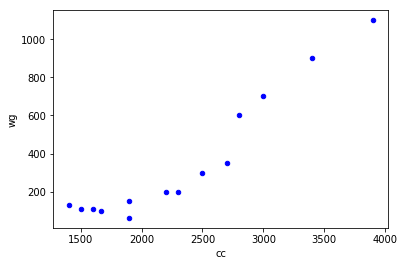

In [3]:
#Visualizing the data using Scatter plot on the imported data

data_f.plot.scatter(x='cc', y='wg', c='Blue')


{'whiskers': [<matplotlib.lines.Line2D at 0x216a4cb07f0>,
 'caps': [<matplotlib.lines.Line2D at 0x216a5009cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x216a5009278>],
 'medians': [<matplotlib.lines.Line2D at 0x216a5014390>],
 'fliers': [<matplotlib.lines.Line2D at 0x216a50146d8>],
 'means': []}

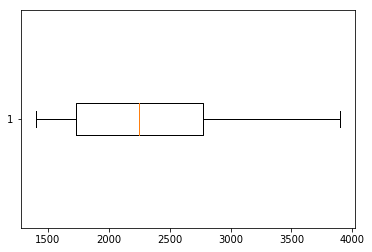

In [4]:
#box plot 
plt.boxplot(data_f.cc,0,'rs',0)

{'whiskers': [<matplotlib.lines.Line2D at 0x216a5045668>,
 'caps': [<matplotlib.lines.Line2D at 0x216a50767b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x216a506cd30>],
 'medians': [<matplotlib.lines.Line2D at 0x216a5076e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x216a5076f28>],
 'means': []}

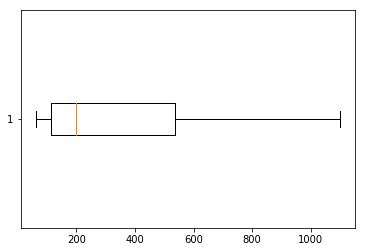

In [5]:
#box plot 
plt.boxplot(data_f.wg,0,'rs',0)


In [6]:
#sorting data set in ascending order by column 'CC'

data_f.sort_values('cc', ascending=True)

,wg,cc
6,128,1400
0,108,1500
5,110,1600
10,100,1670
7,62,1900
11,150,1900
3,200,2200
1,200,2300
4,300,2500
12,350,2700


In [7]:
# correlation value between X and Y
# Both the variables are strongly correlated as the correlation value is 0.94

print(data_f.wg.corr(data_f.cc))

np.corrcoef(data_f.cc,data_f.wg)


0.9469910088554458


array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [8]:
# Improting the statsmodel.formula.api for linear regression model

import statsmodels.formula.api as smf
model=smf.ols('wg~cc',data=data_f).fit()

In [9]:
# For getting coefficients of the varibles used in equation
model.params

Intercept   -625.752356
cc             0.420157
dtype: float64

In [10]:
# P-values for the variables and R-squared value for prepared model
model.summary()

C:\Users\cyadav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           2.86e-07
Time:                        08:23:19   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
cc             0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# 95% confidence interval
model.conf_int(0.05)

,0,1
Intercept,-845.426655,-406.078057
cc,0.330506,0.509807


In [12]:
#shifting the last column in the dataframe to the first place [closed] ealier wg was frst and cc was last column because the wg had 
#some non numberic data was getting error

#cols = list(data_f.columns)
#cols = [cols[-1]] + cols[:-1]
#data_f = data_f[cols]
#data_f



In [13]:
# Predicted values of wg using the model
pred = model.predict(data_f.iloc[:,1]) 

Text(0, 0.5, 'weight gained')

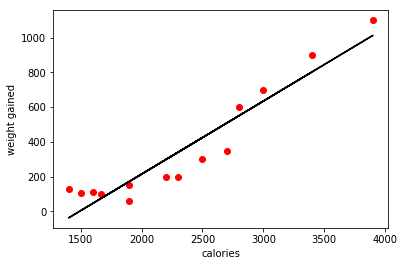

In [14]:
# Visualization of regresion line over the scatter plot of Waist and AT
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt

plt.scatter(x=data_f['cc'],y=data_f['wg'],color='red');plt.plot(data_f['cc'],pred,color='black');plt.xlabel('calories');plt.ylabel('weight gained')

In [15]:
pred.corr(data_f.wg)

0.9469910088554458

In [16]:
#transforming variables for accuracy
model2 = smf.ols('wg~np.log(cc)',data=data_f).fit()

model2.params


Intercept    -6955.650125
np.log(cc)     948.371723
dtype: float64

In [17]:
model2.summary()

C:\Users\cyadav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           1.25e-05
Time:                        08:23:20   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(cc)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print(model2.conf_int(0.01)) # 99% confidence level

                       0            1
Intercept  -10104.600246 -3806.700004
np.log(cc)    540.345229  1356.398218


In [33]:
pred2 = model2.predict(pd.DataFrame(data_f['cc']))
#pred2 = model2.predict(data_f.iloc[:,1]) 
print(pred2)
pred2 = np.exp(pred2)
pred2

0     -19.998702
1     385.377115
2     756.063670
3     343.220320
4     464.453875
5      41.207806
6     -85.429591
7     204.185731
8     571.931596
9     886.181334
10     81.817081
11    204.185731
12    537.441550
13    637.362484
dtype: float64


0      2.063831e-09
1     2.328919e+167
2               inf
3     1.144699e+149
4     5.125722e+201
5      7.876312e+17
6      7.914076e-38
7      4.750465e+88
8     2.436330e+248
9               inf
10     3.409626e+35
11     4.750465e+88
12    2.557995e+233
13    6.353453e+276
dtype: float64

Text(0, 0.5, 'weight gained')

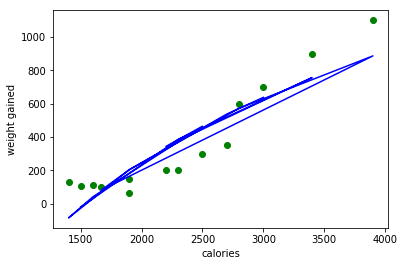

In [20]:
import matplotlib.pylab as plt

plt.scatter(x=data_f['cc'],y=data_f['wg'],color='green');plt.plot(data_f['cc'],pred2,color='blue');plt.xlabel('calories');plt.ylabel('weight gained')

In [21]:
# Exponential transformation.

model3 = smf.ols('np.log(wg)~cc',data=data_f).fit()
model3.params
model3.summary()

C:\Users\cyadav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(wg)   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           8.02e-07
Time:                        08:23:20   Log-Likelihood:                -3.3244
No. Observations:                  14   AIC:                             10.65
Df Residuals:                      12   BIC:                             11.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8387      0.299      9.479      0.000       2.186       3.491
cc             0.0011      0.000      9.276      0.000       0.001       0.001
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   3.130
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.120
Skew:                          -1.240   Prob(JB):                       0.0469
Kurtosis:                       5.083   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print(model3.conf_int(0.01)) # 99% confidence level

                  0         1
Intercept  1.923966  3.753379
cc         0.000760  0.001507


In [23]:
pred_log = model3.predict(pd.DataFrame(data_f['cc']))
pred_log

0     4.539069
1     5.445947
2     6.692904
3     5.332587
4     5.672666
5     4.652428
6     4.425709
7     4.992508
8     6.012745
9     7.259702
10    4.731780
11    4.992508
12    5.899386
13    6.239465
dtype: float64

In [24]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0       93.603577
1      231.816603
2      806.661188
3      206.972681
4      290.808810
5      104.839263
6       83.572027
7      147.305340
8      408.603511
9     1421.833419
10     113.497427
11     147.305340
12     364.813232
13     512.584083
dtype: float64

In [25]:
pred3.corr(data_f.wg)

0.9437992041960717

Text(0, 0.5, 'weight gained')

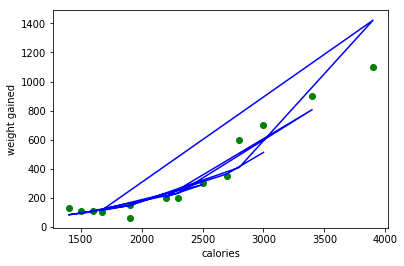

In [26]:
plt.scatter(x=data_f['cc'],y=data_f['wg'],color='green');plt.plot(data_f['cc'],pred3,color='blue');plt.xlabel('calories');plt.ylabel('weight gained')

In [27]:
resid_3 = pred3-data_f.wg

In [28]:
student_resid = model3.resid_pearson 
student_resid

array([ 0.4316832 , -0.44546254,  0.33038284, -0.10340606,  0.09389204,
        0.14499419,  1.28640019, -2.61121356,  1.15925415, -0.7743873 ,
       -0.38203829,  0.05469934, -0.12508015,  0.94028197])

Text(0, 0.5, 'Standardized Residual')

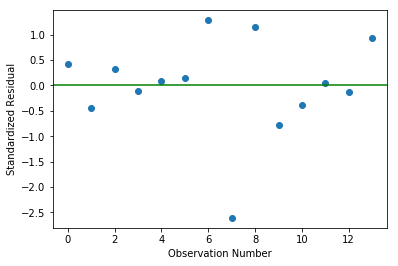

In [29]:
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

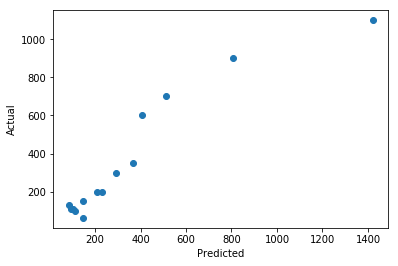

In [30]:
# Predicted vs actual values
plt.scatter(x=pred3,y=data_f.wg);plt.xlabel("Predicted");plt.ylabel("Actual")

In [ ]:
#Rsquared value for the first model was the highest hence we will consider the 1st model for prediction